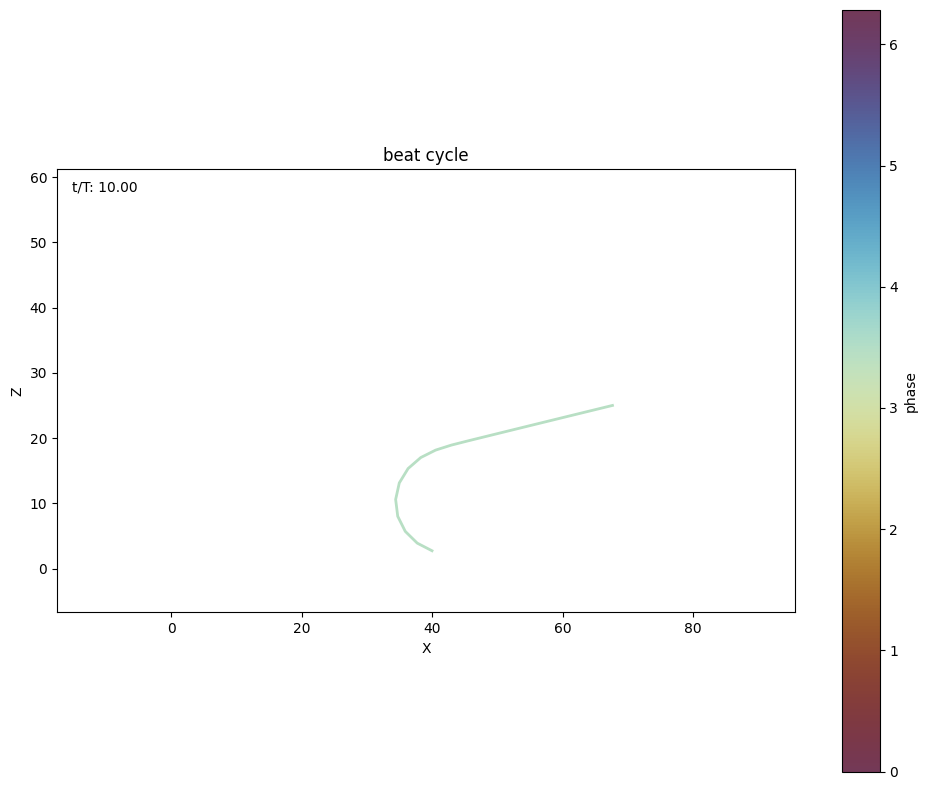

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mcolors
import cmcrameri.cm as cmc

phase_path = '../data/beat_C_double_wall/20260127/ciliate_1fil_40962blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat'
file_path = '../data/beat_C_double_wall/20260127/ciliate_1fil_40962blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_seg_states.dat'

phase = np.loadtxt(phase_path)
time = phase[:, 0] / 500.0
psi1 = np.mod(phase[:, 2], 2*np.pi)

data = np.loadtxt(file_path)
num_steps = data.shape[0]
num_segs = 20

# time = data[:,0]
seg_states = data[:,1:3*(num_segs)+1].reshape(num_steps, int(num_segs), 3)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# For consistent colormapping for psi1
norm = mcolors.Normalize(vmin=0, vmax=2*np.pi)
cmap = cmc.romaO

# Initialize the plot objects
line, = ax.plot([], [], '-', linewidth=2)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_title('beat cycle')
ax.set_aspect('equal')

# Find data bounds for consistent axis limits
y_min, y_max = np.min(seg_states[:,:,1]), np.max(seg_states[:,:,1])
z_min, z_max = np.min(seg_states[:,:,2]), np.max(seg_states[:,:,2])
padding = 0.1 * max(y_max - y_min, z_max - z_min)
ax.set_xlim(y_min - padding, y_max + padding)
ax.set_ylim(z_min - padding, z_max + padding)

# Add time text
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
  line.set_data([], [])
  time_text.set_text('')
  return line, time_text

def update(frame):
  positions = seg_states[frame]
  
  # Update line connecting segments
  line.set_data(positions[:, 1], positions[:, 2])
  line.set_color(cmap(norm(psi1[frame])))
  
  # Update time display
  time_text.set_text(f't/T: {time[frame]:.2f}')
  
  return line, time_text

# Create animation (use stride to control speed)
stride = 2  # Adjust this to make animation faster/slower
frames = range(0, num_steps, stride)
ani = FuncAnimation(fig, update, frames=frames, init_func=init, 
          blit=True, interval=30, repeat=True)

# Add a colorbar for the phase
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('phase')

# Save animation as GIF
ani.save('filament_motion.gif', writer='pillow', fps=30)

plt.tight_layout()
plt.show()
